# Régression

* Modéliser des relations statistiques entre deux variables

* Estimer l'impact de la variation d'une variable explicative sur une variable à expliquer

* Modèle : $y = f(x) + \epsilon$, où $x$ est une variable explicative (entrée), $y$ est une réponse (sortie) et $\epsilon$ un terme d'erreur.

Aide sur Markdown: https://colab.research.google.com/notebooks/markdown_guide.ipynb

# Partie I : Données simulées

## I.1. Régression linéaire

* $f(x) = \langle x, \beta \rangle$

* estimer le vecteur de paramètre $\beta$

a) Générer $n$ données suivant le modèle : $y_i = \beta_0 + \beta_1 x_i + \epsilon_i, i=1,\ldots,n$, avec $n=100$ et des valeurs arbitraires pour $\beta_0$ et $\beta_1$. Afficher les données.

Beta: [0.22139823 0.89409032]


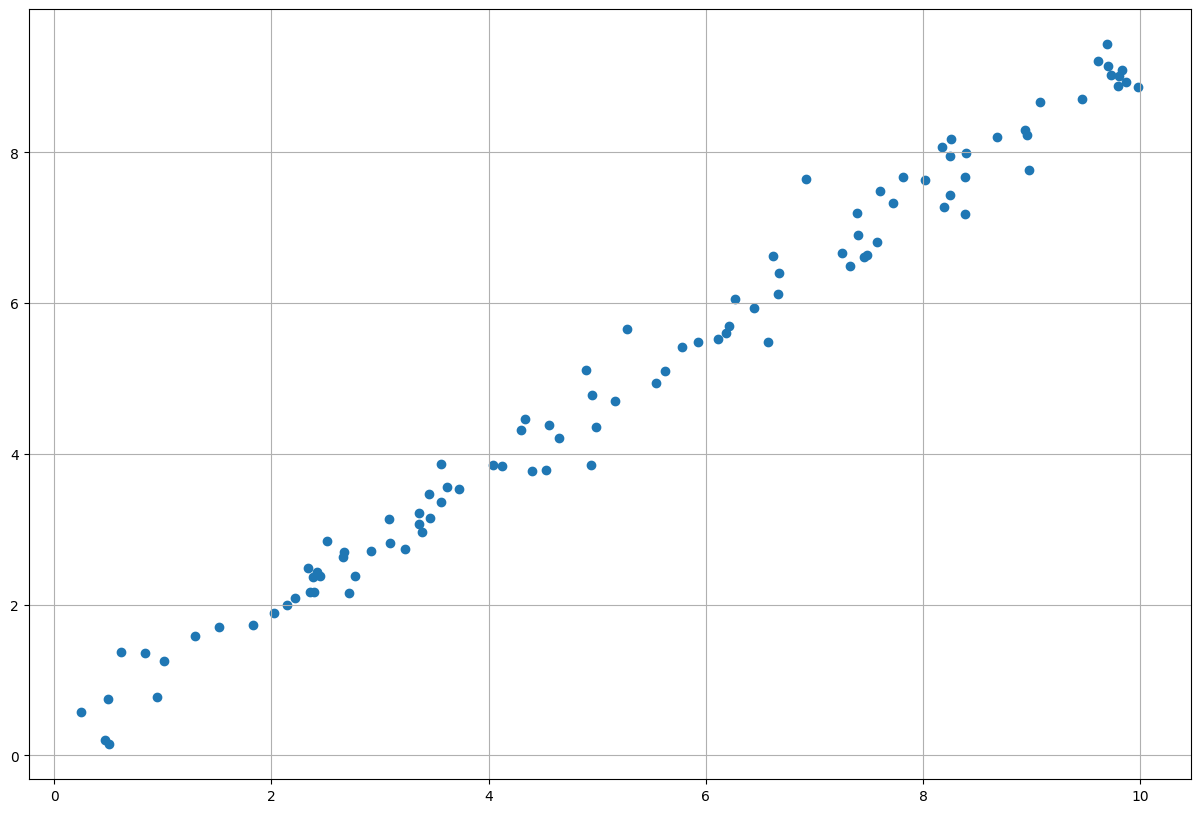

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

beta_ref = np.random.rand(2)
print('Beta:', beta_ref)

n_examples = 100
sigma = 0.3  # écart-type du bruit
x = np.random.rand(n_examples) * 10
y = x * beta_ref[1] + beta_ref[0] + np.random.randn(n_examples) * sigma
plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.grid()

b) Calculer la solution obtenue par une régression linéaire à moindres carrés. Tracer la droite de régression obtenue.

Beta: [0.22139823 0.89409032]
Beta estimé: [0.15448485 0.91048156]
Erreur sur Beta: [-0.06691338  0.01639124]


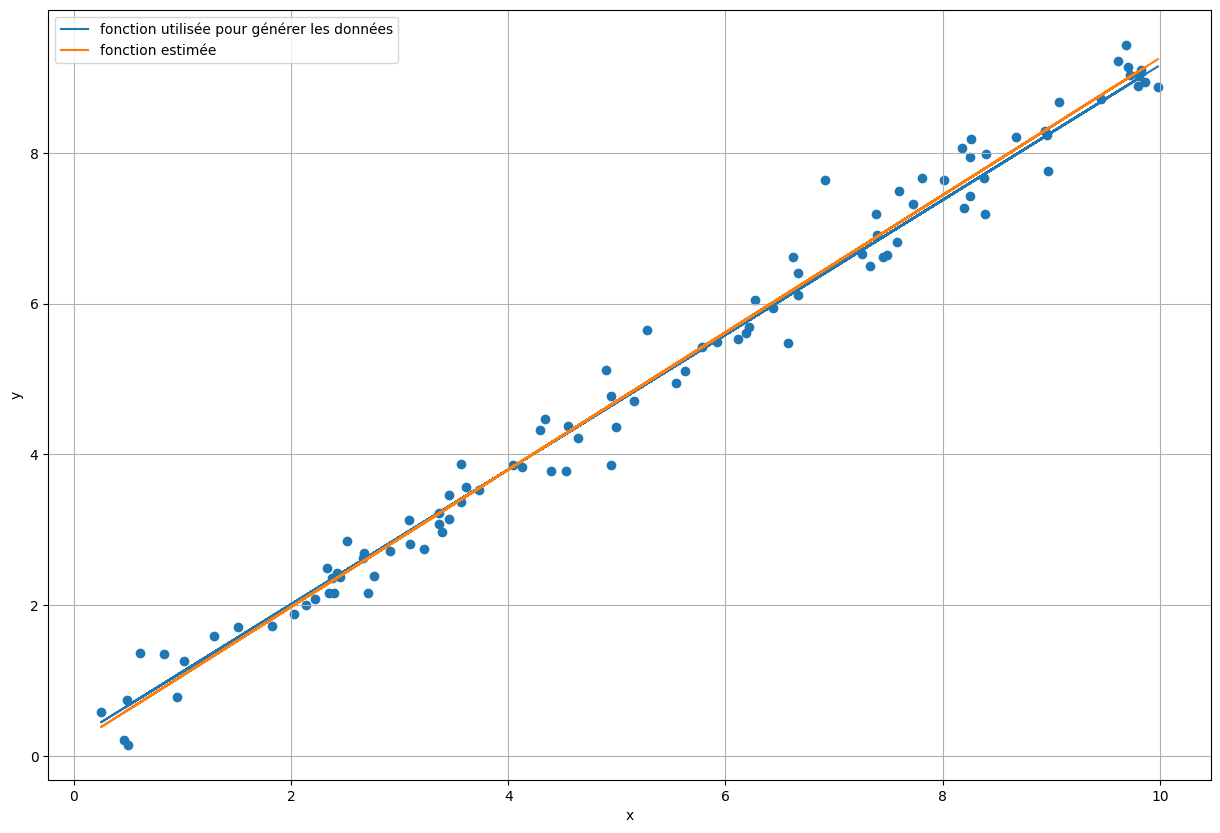

In [2]:
x_moy = np.mean(x)
y_moy = np.mean(y)
beta_est = np.empty(2)
beta_est[1] = np.sum((x - x_moy) * (y - y_moy)) / np.sum((x - x_moy) ** 2)
beta_est[0] = y_moy - beta_est[1] * x_moy
print('Beta:', beta_ref)
print('Beta estimé:', beta_est)
print('Erreur sur Beta:', beta_est - beta_ref)

plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.plot(x, beta_ref[0] + beta_ref[1] * x, label='fonction utilisée pour générer les données')
plt.plot(x, beta_est[0] + beta_est[1] * x, label='fonction estimée')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('exI_lineaire.png')


## I.2. Régression non linéaire


a) Générer des données suivant le modèle : $y_i = \sin(\frac{x_i}{10}) +(\frac{x_i}{50})^2 + \epsilon $, avec $x_i = i, \forall i =1,\ldots,100$. Afficher les données.

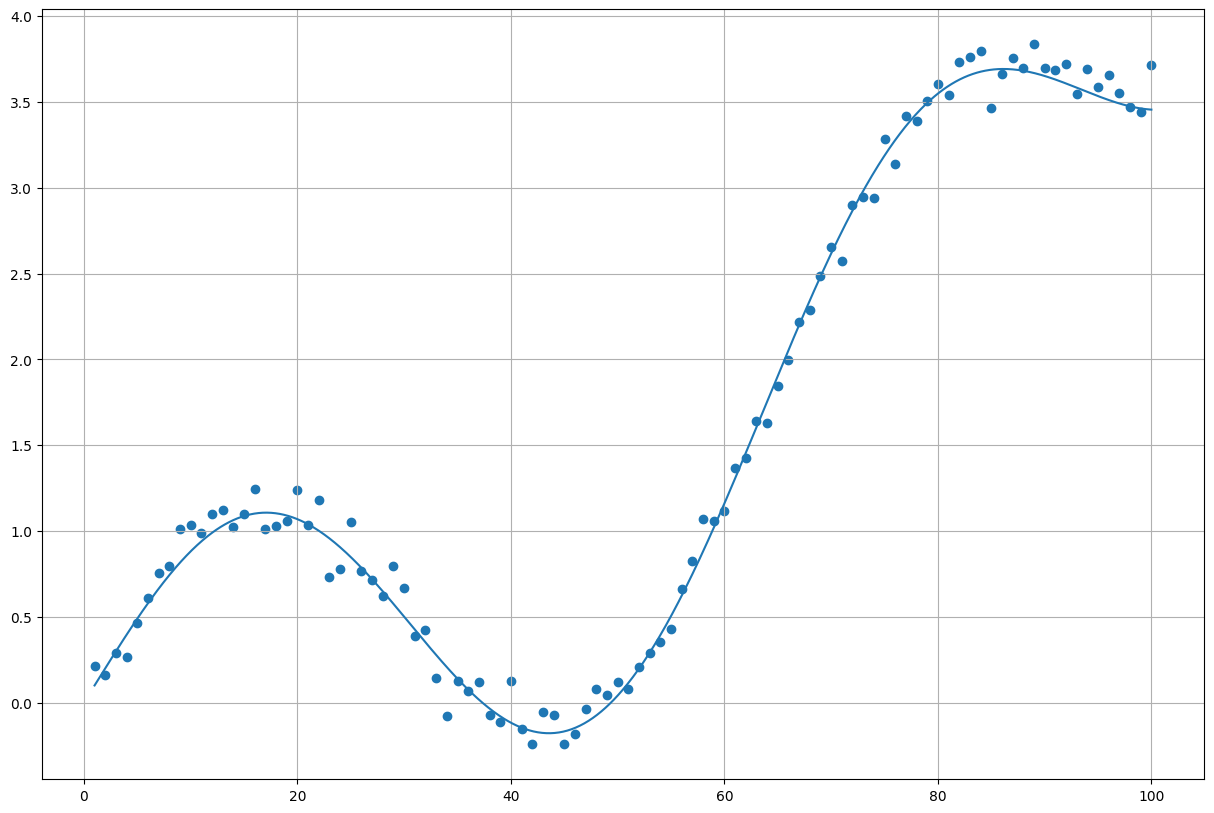

In [52]:
import numpy as np

from matplotlib.pyplot import *

sigma = 0.1
x = np.arange(n_examples) + 1
y = np.sin(x / 10) + (x / 50) ** 2 + np.random.randn(n_examples) * sigma

plt.figure(figsize=(15,10))
x_range = np.linspace(np.min(x), np.max(x), 1000)
y_ref = np.sin(x_range / 10) + (x_range / 50) ** 2
plt.scatter(x, y)
plt.plot(x_range, y_ref, label='True')
plt.grid()

### I.2.1. Régression polynomiale

* $y = \beta_0 + \beta_1 x + \beta_2 x^2 +\beta_3 x^3$

* La solution d'une régression linéaire : $\hat{\beta} = (X^\top X)^{-1} X^\top Y$

* Utiliser $X = [1 \ x \ x^2 \ x^3]$


a) Ecrire une fonction qui retourne la solution de la régression linéaire multiple.

In [53]:
def learn_regression_poly3(x, y):
    x = x[:, None]  # conversion du vecteur en matrice à une colonne ([n,1])
    # Création des 4 features (puissances de x)
    X = np.concatenate([x ** 0, x ** 1, x ** 2, x ** 3], axis=1)
    # Calcul des coeffcients de la régression linéaire aux moindres carrés
    #return np.linalg.inv(X.T @ X) @ X.T @ y
    return np.linalg.pinv(X.T @ X)@ X.T @ y

b) Utilisant la fonction ci-dessus, estimer les paramètres du modèle de régression polynomiale et afficher la solution.

[-4.76239268e-01  4.27593335e-02 -1.62936251e-05 -2.79435254e-07]


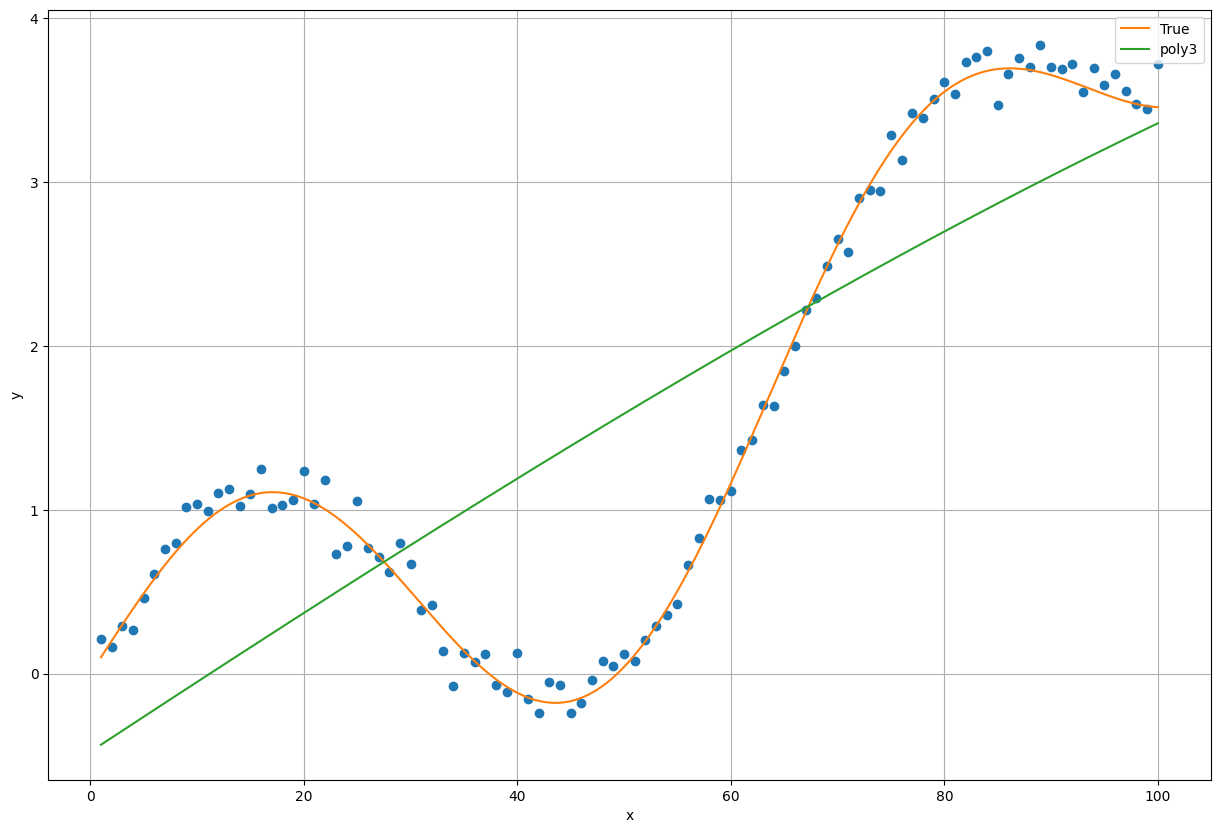

In [56]:
beta_est = learn_regression_poly3(x, y)
print(beta_est)

def predict_regression_poly3(x, beta):
    x = x[:, None]
    X = np.concatenate([x ** 0, x ** 1, x ** 2, x ** 3], axis=1)
    return X @ beta


plt.figure(figsize=(15,10))
plt.plot(x, y, 'o')
plt.plot(x_range, y_ref, label='True')
plt.plot(x_range, predict_regression_poly3(x_range, beta_est), label='poly3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Partie II : Données réelles

## II.1. Récupérer et préparer les données

### II.1.1. Récupération

Vous allez travailler sur les données suivantes : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#, et en particulier sur le fichier day.csv de ce jeu de données.



- Si vous utilisez jupyter notebook sur votre ordinateur, le jeu de données peut être chargé en utilisant la commande suivante :  `data = pd.read_csv('day.csv')` ou `data = pd.read_csv('Bike-Sharing-Dataset/day.csv')` suivant où se trouve le fichier.

- Si vous travaillez sur google colab vous devrez uploader le fichier day.csv sur votre drive et lier l'execution de votre colab notebook avec votre drive pour pouvoir ensuite y accéder comme ci dessus.

Pour lier l'execution de votre colab notebook avec votre drive il suffit d'exécuter au début de votre notebook les instructions :

```
from google.colab import drive
drive.mount('/content/drive')
```
Une fois ces instructions exécutées votre drive est accessible depuis votre notebook et vous pouvez lire ou sauvegarder dans un fichier de votre drive à partir du notebook, par exemple avec:

```
pd.read_csv(...)
```
Il vous faut cependant bien spécifier le chemin vers le fichier.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls /content/drive/MyDrive/Enseignement/M2_IAAA/Bike-Sharing-Dataset

### II.1.2. Préparation

Pour préparer les données, vous éliminerez les colonnes 'instant', 'dteday', 'casual', 'registered' des données et constituerez les données d'entrée et de sortie afin de prédire la colonne 'cnt' à partir des colonnes restantes.

In [59]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
X.shape, y.shape


((17379, 13), (17379, 1))

In [60]:
pd.DataFrame(X)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [61]:
X = pd.DataFrame(X)
X = X.drop(columns=["dteday"], axis=1)

## II.2. Régression Ridge et Lasso

La régression ridge et lasso sont des extensions de la régression linéaire par moindres carrés permettant d'éviter le risque de sur-apprendtissage. L'idée est d'ajouter une pénalisation au problème de régression par moindres carrés:
$$ \arg\min_{w\in\mathbb{R}^d, b\in\mathbb{R}} \sum_{i=1}^n \big(y_i - \langle w, x_i \rangle-b\big)^2 + \lambda \Omega(w),$$
où $\lambda\in\mathbb{R}$ est un paramètre de régularisation, $\Omega(w) = \|w\|_2^2$ pour la régression ridge et $\Omega(w) = \|w\|_1$ pour le Lasso.

a) Utilisant la bibliothèque Scikit-learn, appliquez la régression Ridge et la régression Lasso sur le jeu de données "Bike Sharing". Affichez et comparez les deux solutions obtenues.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
ridge.fit(X, y)

lasso = Lasso()
lasso.fit(X, y)

Lasso()

b) Calculez les erreurs de prédiction sur les données d'apprentissage obtenues avec les régressions Ridge et Lasso (utiliser la valeur par défaut de Scikit-learn pour le paramètre de régularisation). Comparez les résultats avec ceux obtenus par la régression par moindre carrés.

In [63]:
lasso.predict(X)

array([-62.88040862, -58.26244928, -50.22190034, ..., 217.66225211,
       232.62355554, 225.22540535])

## II.2.3. Réglage des hyper paramètres par cross validation

Le choix du paramètre $\lambda$ est primordial pour avoir des résultats de prédiction optimaux. Une façon de procéder pour trouver une bonne valeur $\lambda$ est d'utiliser la méthode de cross-validation sur une grille de valeurs. Déterminer par cross-validation les valeurs de $\lambda$ permettant d'avoir les meilleurs taux de prédiction.

Vous tracerez les courbes de performance en validation (ordonnée) en fonction de $\lambda$ (abscisse) pour les modèles Ridge et Lasso.  



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape

((12165, 12), (12165, 1))

In [89]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

def k_folds(alpha: float, k: int = 10):
    num_val_samples = len(X_train) // k
    all_lasso_scores = []
    all_ridge_scores = []

    for i in range(k):
        val_data = X_train[i * num_val_samples: (i+1) * num_val_samples]
        val_targets = y_train[i * num_val_samples: (i+1) * num_val_samples]
    
        partial_x_train = np.concatenate([X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]], axis=0)
        partial_y_train = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]], axis=0)
    
        ridge = Ridge(alpha=alpha)
        ridge.fit(partial_x_train, partial_y_train)
        y_predict = ridge.predict(val_data)
        all_ridge_scores.append(mean_squared_error(val_targets, y_predict))
    
        lasso = Lasso(alpha=alpha)
        lasso.fit(partial_x_train, partial_y_train)
        y_predict = lasso.predict(val_data)
        all_lasso_scores.append(mean_squared_error(val_targets, y_predict))
        
    return np.array(all_lasso_scores), np.array(all_ridge_scores)


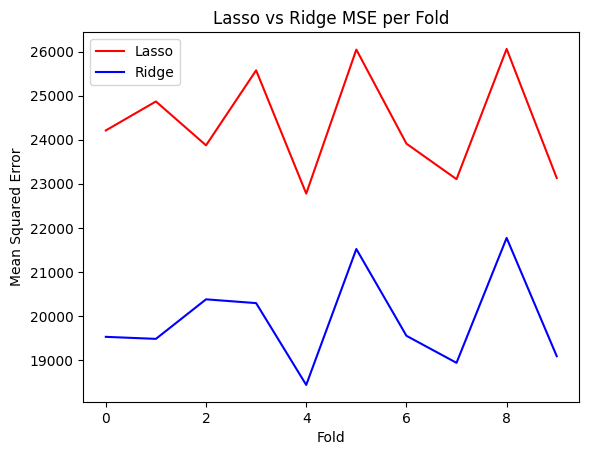

In [93]:
lasso_scores, ridge_scores = k_folds(alpha=10, k=10)

plt.plot(range(10), lasso_scores, c="red", label="Lasso")
plt.plot(range(10), ridge_scores, c="blue", label="Ridge")
plt.xlabel("Fold")
plt.ylabel("Mean Squared Error")
plt.title("Lasso vs Ridge MSE per Fold")
plt.legend()
plt.show()


## II.2.4. Analyse du modèle appris

- En examinant les poids du meilleur modèle dont vous disposez, déterminez quels sont les attributs les plus importants pour la tâche de prédiction. Plus le paramètre correspondant à une colonne est petit en valeur absolue moins la caractéristique correspondante est importante.

Quelles sont les caractéristiques ayant le plus de pouvoir prédictif dans ce problème de régression ?

- Reproduisez l'ensemble de l'expérience (apprentissage, choix du meilleur modèle et analyse des paramètres de ce modèle) en normalisant **avant toute chose** les données avec un standard scaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Les résultats sont-ils différents et pourquoi ?



In [ ]:
# A compléter